In [143]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Exercise 1:

In [144]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alphas = [0.01,0.05,0.1]
ws = []
for alpha in alphas:
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    w=w.ravel()
    ws.append(w)
    y_pred = x * w.T
    mse = np.mean((y - np.asarray(y_pred)) ** 2)
    print(f"{np.asarray(w)[:, 1][0]:.2f}x + {np.asarray(w)[:, 0][0]:.2f}:")
    print(f"  średni błąd dla alpha:{alpha} = {mse} ")

1.54x + -167.86:
  średni błąd dla alpha:0.01 = 373.79379985360964 
1.33x + -130.23:
  średni błąd dla alpha:0.05 = 394.33935825059297 
1.17x + -101.72:
  średni błąd dla alpha:0.1 = 426.0450770831749 


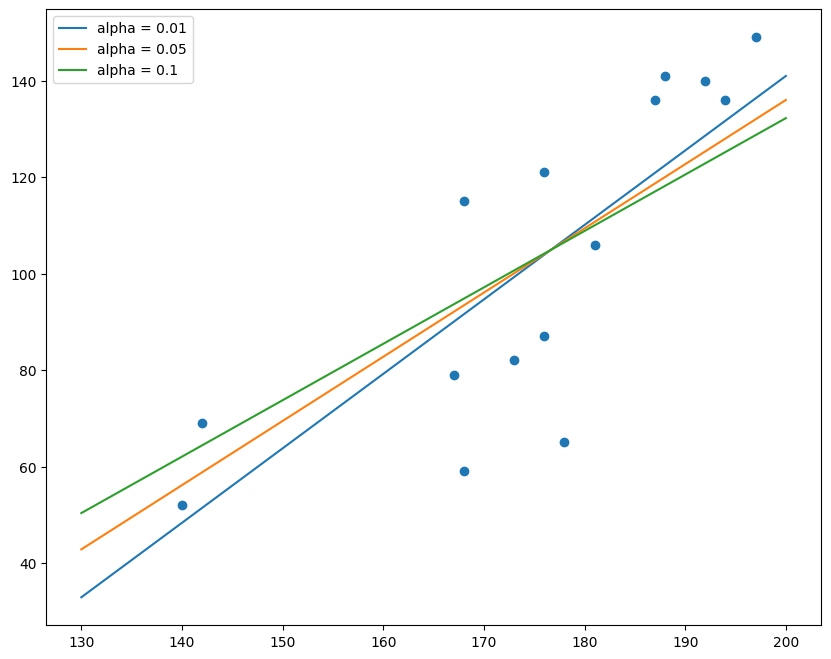

In [145]:
linXspace = np.linspace(130, 200)
plt.figure(figsize=(10,8))
plt.scatter(np.asarray(x[:,1]), y)
for i,e  in enumerate(ws):
    ys = [nx * e[0, 1] + e[0, 0] for nx in linXspace]
    plt.plot(linXspace, ys, label=f"alpha = {alphas[i]}")
    
plt.legend()
plt.show()


# Exercise 2:


In [146]:
def sgd(x, y, alpha, lbd=0.1, max_iters=100, batch_size=1):
    M, p = x.shape
    w = np.ones(p).reshape(-1, 1)

    for _ in range(max_iters):
        
        indexes = np.random.choice(M, size=batch_size, replace=True)
        x_batch = x[indexes]
        y_batch = y[indexes]
        
        y_pred = x_batch.dot(w)
        err = y_batch - y_pred
        gradient = (-2 * (x_batch.T).dot(err)) / batch_size

        l1 = lbd * np.sign(w)

        w = w - alpha * (gradient + l1)

    return w


In [151]:
x = (
    np.array(
        [188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]
    )
    .reshape(-1, 1)
    .reshape(15, 1)
)
y = (
    np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121])
    .reshape(-1, 1)
    .reshape(15, 1)
)

# x = np.c_[np.ones((15, 1)), x]

mu = np.mean(x)
std = np.std(x)
x_standardized = (x - mu) / std

x_standardized = np.c_[np.ones((15, 1)), x_standardized]


alpha = 0.1

w_sgd = sgd(x_standardized, y, alpha, lbd=0.1, max_iters=10000, batch_size=8)

lasso_regression = Lasso(alpha=alpha)
lasso_regression.fit(X=x_standardized, y=y)
w_lasso_skl = np.asarray(
    [
        [lasso_regression.intercept_[0]],
        [lasso_regression.coef_[1]],
]
)

print(f"Współczynniki mojej funkcji sgd: {w_sgd[1][0]:.2f}x + {w_sgd[0][0]:.2f}")
print(
    f"Współczynniki funkcji z sklearn: {w_lasso_skl[1][0]:.2f}x + {w_lasso_skl[0][0]:.2f}"
)

my_y_pred = x_standardized.dot(w_sgd)
skl_y_pred = x_standardized.dot(w_lasso_skl)
my_mse = np.mean((y - np.asarray(my_y_pred)) ** 2)
skl_mse = np.mean((y - np.asarray(skl_y_pred)) ** 2)
print(f"średni błąd mojej funkcji sgd = {my_mse} ")
print(f"średni błąd lasso regression z sklearn = {skl_mse} ")


Współczynniki mojej funkcji sgd: 27.12x + 101.07
Współczynniki funkcji z sklearn: 26.24x + 102.47
średni błąd mojej funkcji sgd = 374.9097146079041 
średni błąd lasso regression z sklearn = 372.3412921517968 


# Exercise 3:

In [148]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_df["target"] = iris_data.target

x = iris_df[["sepal width (cm)", "sepal length (cm)"]].values
y = iris_df['target'].values.reshape((-1,1))

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x

y_pred = a * x + b


In [149]:
y_pred

array([[0.92478522, 1.05141831],
       [0.88521238, 1.03558917],
       [0.90104152, 1.01976004],
       [0.89312695, 1.01184547],
       [0.93269979, 1.04350374],
       [0.95644349, 1.07516201],
       [0.91687065, 1.01184547],
       [0.91687065, 1.04350374],
       [0.87729781, 0.99601633],
       [0.89312695, 1.03558917],
       [0.94061436, 1.07516201],
       [0.91687065, 1.02767461],
       [0.88521238, 1.02767461],
       [0.88521238, 0.98810177],
       [0.96435806, 1.10682029],
       [0.99601633, 1.09890572],
       [0.95644349, 1.07516201],
       [0.92478522, 1.05141831],
       [0.94852893, 1.09890572],
       [0.94852893, 1.05141831],
       [0.91687065, 1.07516201],
       [0.94061436, 1.05141831],
       [0.93269979, 1.01184547],
       [0.90895609, 1.05141831],
       [0.91687065, 1.02767461],
       [0.88521238, 1.04350374],
       [0.91687065, 1.04350374],
       [0.92478522, 1.05933288],
       [0.91687065, 1.05933288],
       [0.90104152, 1.01976004],
       [0.